<a href="https://colab.research.google.com/gist/wjensheng/5fbb8d22600a22ced159acf06c08b3ff/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food-101

---

This notebook aims at exploring the classification of food pictures to their respective labels. I would like to extend my gratitude to Lukas Bossard, Matthieu Guillaumin, Luc Van Gool for sharing the [dataset](https://www.vision.ee.ethz.ch/datasets_extra/food-101/).

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
!pip install fastai

In [5]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

import warnings
warnings.simplefilter(action='ignore')

PATH = "/content/drive/My Drive/Colab Notebooks/food/FOOD_BATCH/images"
os.chdir("/content/drive/My Drive/Colab Notebooks/food/")

!ls -a

food-101	 food.ipynb	    resnet50-iteration-6.log  test.ipynb
food-101.tar.gz  out.log	    resnet50.log
FOOD_BATCH	 parameters.gsheet  resnet50.log.gdoc


Here, I attempted to add some form of transformation, including `symmetric_wrap`, `perspective_wrap`, `dihedral`, and modifying the parameters such as `max_zoom`, `max_rotate`, and `max_lighting`. Unfortunately, the default happens to work best.

In [7]:
%%time
np.random.seed(42)
data = (ImageDataBunch.
        from_folder(PATH, 
                   train=".", 
                   valid_pct=0.2, 
                   ds_tfms=get_transforms(), 
                   size=224, 
                   num_workers=4).
        normalize(imagenet_stats))

CPU times: user 3.34 s, sys: 248 ms, total: 3.58 s
Wall time: 2min 22s


CPU times: user 2.61 s, sys: 1.18 s, total: 3.79 s
Wall time: 42.2 s


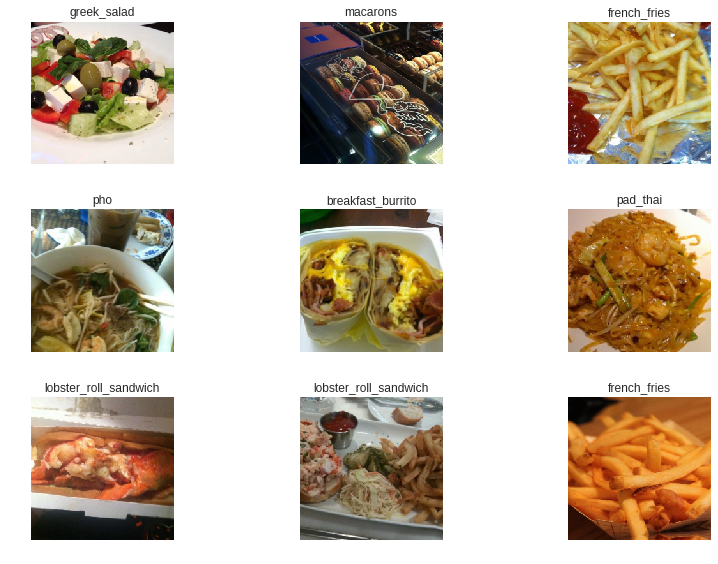

In [0]:
%%time
data.show_batch(rows=3, figsize=(12,8))

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(101, 80834, 20208)




*   `create_cnn` is best model to deploy from fastai's library. 
*    `resnet50` has an `error_rate` of 33% compared to `resnet34`'s 38% . 
*   `error_rate` was choose as a metric because this is a classification problem.






In [8]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 84973802.10it/s]


In [0]:
# learn.fit_one_cycle(1)

# learn.save('iteration-8')

In [0]:
learn.load('iteration-2-2')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


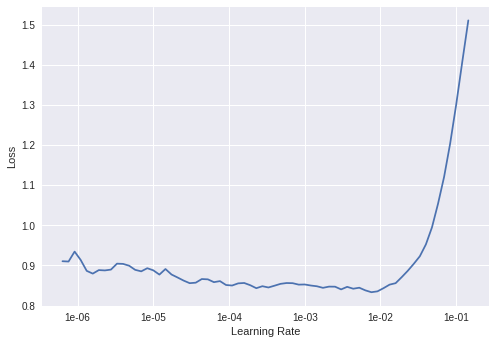

In [0]:
learn.recorder.plot()

In [0]:
lr=5e-3
learn.unfreeze()
learn.fit_one_cycle(1, slice(lr))

learn.save('iteration-2-2-1')

epoch,train_loss,valid_loss,error_rate,time
1,0.941087,0.838403,0.223674,2:09:35


In [0]:
learn.load('iteration-2-2-1')

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

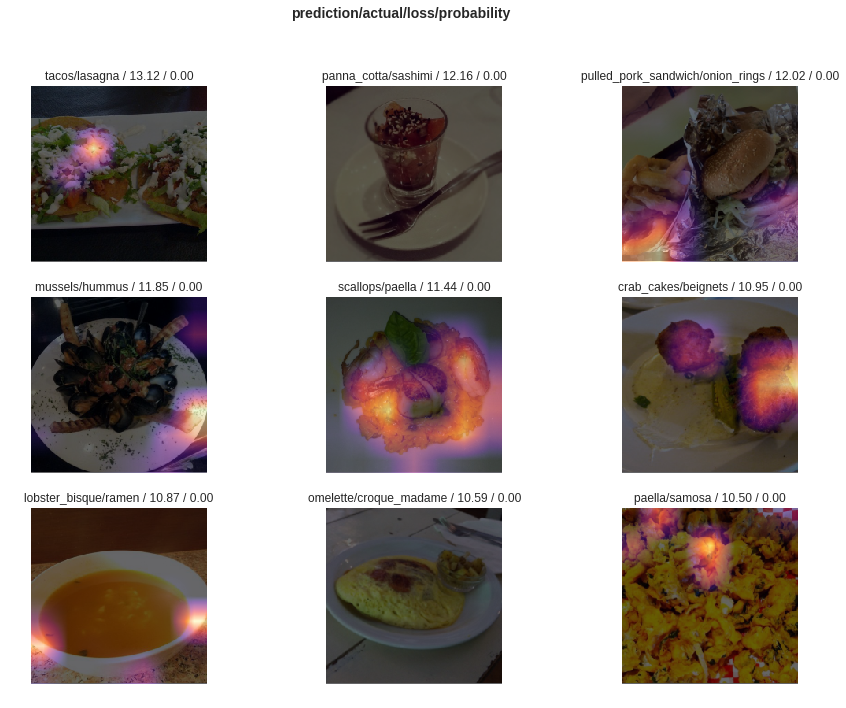

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
interp.most_confused(min_val=2)[:10]

[('chocolate_cake', 'chocolate_mousse', 32),
 ('steak', 'filet_mignon', 32),
 ('apple_pie', 'bread_pudding', 26),
 ('beef_tartare', 'tuna_tartare', 25),
 ('chocolate_mousse', 'chocolate_cake', 23),
 ('steak', 'prime_rib', 21),
 ('pork_chop', 'grilled_salmon', 20),
 ('lobster_bisque', 'clam_chowder', 18),
 ('prime_rib', 'steak', 17),
 ('cheesecake', 'panna_cotta', 16)]

These seem to be fair confusion since it's certainly hard to distingusih chocalate cake from chocolate mousse. In conclusion, I would definitely like to try out more transformations in hope of achieving the accuracy of 85%.